In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file
try:
    with open('read.txt', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print("File 'read.txt' not found.")
    exit()

# Convert to lower case and remove punctuation
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Tokenize words
tokenized_words = word_tokenize(cleaned_text, "english")

# Remove stop words
stop_words = set(stopwords.words('english'))
final_words = [word for word in tokenized_words if word not in stop_words]

# Process emotions from emotions.txt
emotion_list = []
try:
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
            try:
                word, emotion = clear_line.split(':')
                word = word.strip()
                emotion = emotion.strip()
                if word in final_words:
                    emotion_list.append(emotion)
            except ValueError:
                print(f"Skipping line due to format error: {line}")
except FileNotFoundError:
    print("File 'emotions.txt' not found.")
    exit()

# Count emotions
w = Counter(emotion_list)
print(w)

# Plotting the results
fig, ax = plt.subplots()
ax.bar(w.keys(), w.values())
plt.xticks(rotation=45)
plt.xlabel("Emotions")
plt.ylabel("Frequency")
plt.title("Emotion Analysis from Text")
plt.tight_layout()
plt.savefig('graph.png')
plt.show()


AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [5]:
pip show nltk


Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: g:\Python Projects\Sentiment Analysis\.venv\Lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Counter({'positive': 84, 'trust': 61, 'negative': 60, 'anticipation': 46, 'joy': 44, 'fear': 39, 'sadness': 39, 'surprise': 26, 'anger': 21, 'disgust': 20})


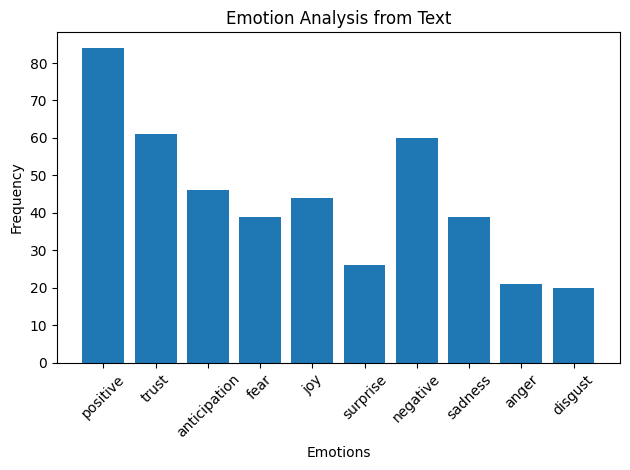

In [1]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file
try:
    with open('read.txt', encoding='utf-8') as file:
        text = file.read()
except FileNotFoundError:
    print("File 'read.txt' not found.")
    exit()

# Convert to lower case and remove punctuation
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Tokenize words
tokenized_words = word_tokenize(cleaned_text, "english")

# Remove stop words
stop_words = set(stopwords.words('english'))
final_words = [word for word in tokenized_words if word not in stop_words]

# Load the NRC Emotion Lexicon
emotion_dict = {}
try:
    with open('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as file:
        for line in file:
            word, emotion, is_associated = line.strip().split('\t')
            if is_associated == '1':
                if word not in emotion_dict:
                    emotion_dict[word] = []
                emotion_dict[word].append(emotion)
except FileNotFoundError:
    print("File 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt' not found.")
    exit()

# Collect emotions for words in text
emotion_list = []
for word in final_words:
    if word in emotion_dict:
        emotion_list.extend(emotion_dict[word])

# Count emotions
w = Counter(emotion_list)
print(w)

# Plotting the results
fig, ax = plt.subplots()
ax.bar(w.keys(), w.values())
plt.xticks(rotation=45)
plt.xlabel("Emotions")
plt.ylabel("Frequency")
plt.title("Emotion Analysis from Text")
plt.tight_layout()
plt.savefig('graph.png')
plt.show()
